# Predicting stock prices with linear regression

In [8]:
import pandas as pd
import yfinance as yf

aapl = yf.Ticker("AAPL")
aapl_hist = aapl.history(period="max")

In [10]:
aapl_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0


<Axes: xlabel='Date'>

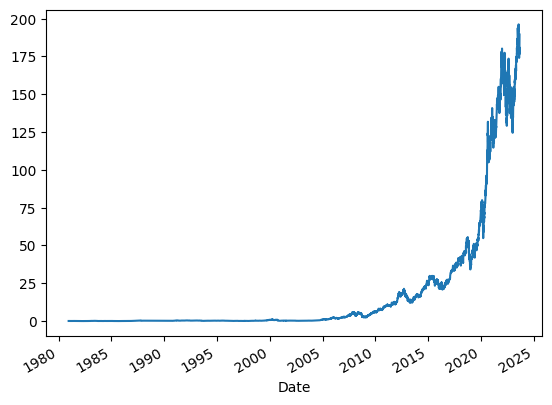

In [33]:
aapl_hist.Close.plot()

In [34]:
aapl_hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10771.000000,10771.000000,10771.000000,10771.000000,1.077100e+04,10771.000000,10771.000000
mean,18.089782,18.292062,17.895438,18.101811,3.235014e+08,0.000700,0.001578
std,39.224869,39.676195,38.803863,39.259190,3.368424e+08,0.011164,0.084540
min,0.038483,0.038483,0.038050,0.038050,0.000000e+00,0.000000,0.000000
25%,0.239341,0.244931,0.234266,0.240114,1.179080e+08,0.000000,0.000000
50%,0.413292,0.420255,0.406400,0.413292,2.110752e+08,0.000000,0.000000
75%,15.873542,16.027181,15.715828,15.895705,4.035864e+08,0.000000,0.000000
max,195.975362,197.962667,195.016650,196.185074,7.421641e+09,0.240000,7.000000


In [35]:
aapl_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10771 entries, 1980-12-12 00:00:00-05:00 to 2023-09-01 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10771 non-null  float64
 1   High          10771 non-null  float64
 2   Low           10771 non-null  float64
 3   Close         10771 non-null  float64
 4   Volume        10771 non-null  int64  
 5   Dividends     10771 non-null  float64
 6   Stock Splits  10771 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 931.2 KB


In [20]:
# Shifts the close price down by one day
close = aapl_hist['Close'].shift(-1).dropna()

# Training a linear regression model and making predictions

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = aapl_hist[['Open', 'High', 'Low', 'Volume']].loc[close.index]
y = close

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [30]:
model.score(X_test, y_test)

0.9995559976188592

# Plotting the predictions against the actual values

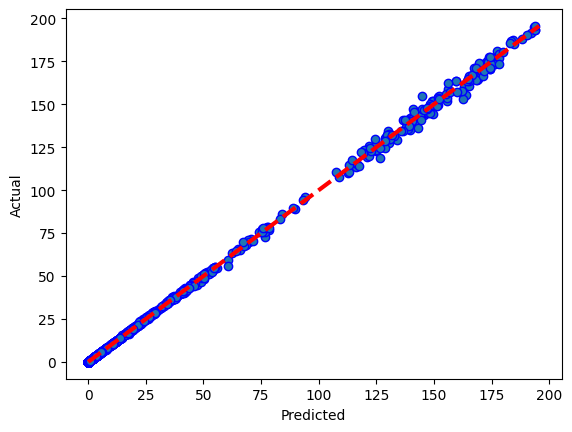

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(predictions, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()